In [3]:
import pandas as pd

df = pd.read_csv("data.csv", encoding="ISO-8859-1", low_memory=False)
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [4]:
# Check for negative quantities (returns)
negative_qty = df[df['Quantity'] < 0]
print(f"Negative quantities: {len(negative_qty)} rows")

# Check for zero or negative prices
invalid_price = df[df['UnitPrice'] <= 0]
print(f"Zero or negative prices: {len(invalid_price)} rows")



Negative quantities: 10624 rows
Zero or negative prices: 2517 rows


In [5]:
# Step 3.1: Flag returns
df['is_return'] = df['Quantity'] < 0

# Step 3.2: Remove zero or negative prices
df = df[df['UnitPrice'] > 0]

# Step 3.3: Check again
print("Remaining rows:", len(df))
print("Returns flagged:", df['is_return'].sum())


Remaining rows: 539392
Returns flagged: 9288


In [6]:
df = df.dropna(subset=['Description'])  # drop rows with missing Description


In [7]:
df = df.dropna(subset=['CustomerID'])  # drop rows with missing CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)  # make it integer for consistency


In [9]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Description  406789 non-null  object 
 3   Quantity     406789 non-null  int64  
 4   InvoiceDate  406789 non-null  object 
 5   UnitPrice    406789 non-null  float64
 6   CustomerID   406789 non-null  int64  
 7   Country      406789 non-null  object 
 8   is_return    406789 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 28.3+ MB


,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# 1. Basic Overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (406789, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Description  406789 non-null  object 
 3   Quantity     406789 non-null  int64  
 4   InvoiceDate  406789 non-null  object 
 5   UnitPrice    406789 non-null  float64
 6   CustomerID   406789 non-null  int64  
 7   Country      406789 non-null  object 
 8   is_return    406789 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 28.3+ MB
None

Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
is_return      0
dtype: int64


In [11]:
# 2. Add Total Price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [12]:
# 3. Sales Overview
print("\nTotal Revenue:", df['TotalPrice'].sum())
print("Total Transactions:", df['InvoiceNo'].nunique())
print("Unique Customers:", df['CustomerID'].nunique())


Total Revenue: 8300065.814
Total Transactions: 22186
Unique Customers: 4371


In [13]:
# 4. Top 10 Best-Selling Products by Quantity
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:\n", top_products_qty)


Top 10 Best-Selling Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


In [14]:
# 5. Top 10 Revenue Generating Products
top_products_rev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Revenue Products:\n", top_products_rev)



Top 10 Revenue Products:
 Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64


In [15]:
# 6. Top 10 Customers by Spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Spending:\n", top_customers)


Top 10 Customers by Spending:
 CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalPrice, dtype: float64


In [16]:
# 7. Sales by Country
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Sales:\n", top_countries)


Top 10 Countries by Sales:
 Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


In [17]:
# 8. Convert InvoiceDate to datetime for time analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
# 9. Monthly Sales Trend
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
print("\nMonthly Sales:\n", monthly_sales)


Monthly Sales:
 InvoiceDate
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-03     579964.610
2011-04     426047.851
2011-05     648251.080
2011-06     608013.160
2011-07     574238.481
2011-08     616368.000
2011-09     931440.372
2011-10     974603.590
2011-11    1132407.740
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64


In [19]:
# 10. Sales by Day of Week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum().sort_values(ascending=False)
print("\nSales by Day of Week:\n", sales_by_day)


Sales by Day of Week:
 DayOfWeek
Thursday     1906108.190
Tuesday      1563193.591
Wednesday    1530477.490
Monday       1274551.511
Friday       1241316.181
Sunday        784418.851
Name: TotalPrice, dtype: float64


In [20]:
df.shape

(406789, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  int64         
 7   Country      406789 non-null  object        
 8   is_return    406789 non-null  bool          
 9   TotalPrice   406789 non-null  float64       
 10  DayOfWeek    406789 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 34.5+ MB


**UNIVARIENT ANALYSIS**


In [22]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,406789.000000,406789,406789.000000,406789.000000,406789.000000
mean,12.028359,2011-07-10 16:28:44.845459968,3.460811,15287.795830,20.403860
min,-80995.000000,2010-12-01 08:26:00,0.001000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13954.000000,4.200000
50%,5.000000,2011-07-31 11:46:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,247.927842,NaN,69.318561,1713.573064,427.612692


In [25]:
df['Quantity'].value_counts()


,count
Quantity,
1,73301
12,60031
2,57999
6,37688
4,32180
...,...
-184,1
244,1
-80995,1


In [29]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'is_return', 'TotalPrice',
       'DayOfWeek'],
      dtype='object')

In [30]:
df.groupby('Description')['TotalPrice'].mean()


,TotalPrice
Description,
4 PURPLE FLOCK DINNER CANDLES,6.942564
50'S CHRISTMAS GIFT BAG LARGE,20.634091
DOLLY GIRL BEAKER,19.648214
I LOVE LONDON MINI BACKPACK,20.771429
I LOVE LONDON MINI RUCKSACK,4.150000
...,...
ZINC T-LIGHT HOLDER STARS SMALL,15.947967
ZINC TOP 2 DOOR WOODEN SHELF,8.431818
ZINC WILLIE WINKIE CANDLE STICK,11.226684


**BIVARIENT ANALYSIS**

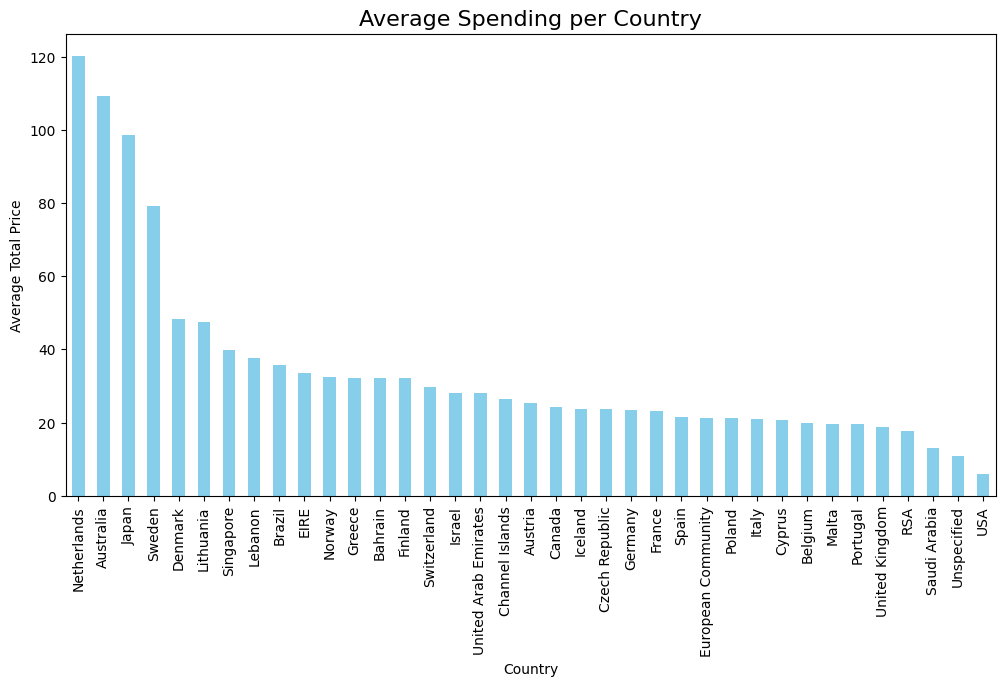

In [32]:
#Average Spending per Country
import matplotlib.pyplot as plt
import pandas as pd

# Group by country and calculate average total price
country_avg = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
country_avg.plot(kind='bar', color='skyblue')
plt.title('Average Spending per Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Average Total Price')
plt.xticks(rotation=90)
plt.show()


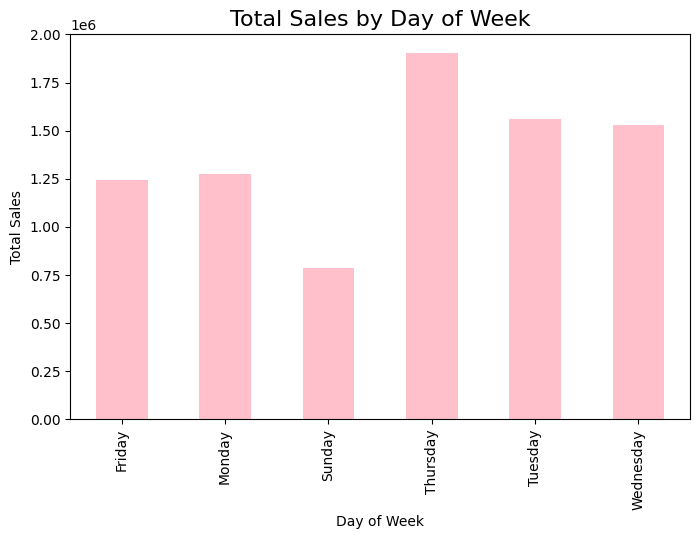

In [37]:
# Group by DayOfWeek and sum TotalPrice
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(8,5))
sales_by_day.plot(kind='bar', color='pink')
plt.title('Total Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


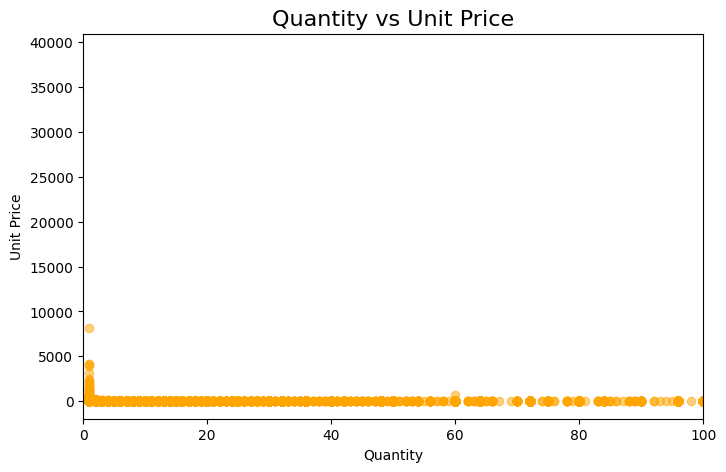

In [38]:
#Quantity vs Unit Price
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5, color='orange')
plt.title('Quantity vs Unit Price', fontsize=16)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.xlim(0, 100)  # To remove extreme outliers if needed
plt.show()


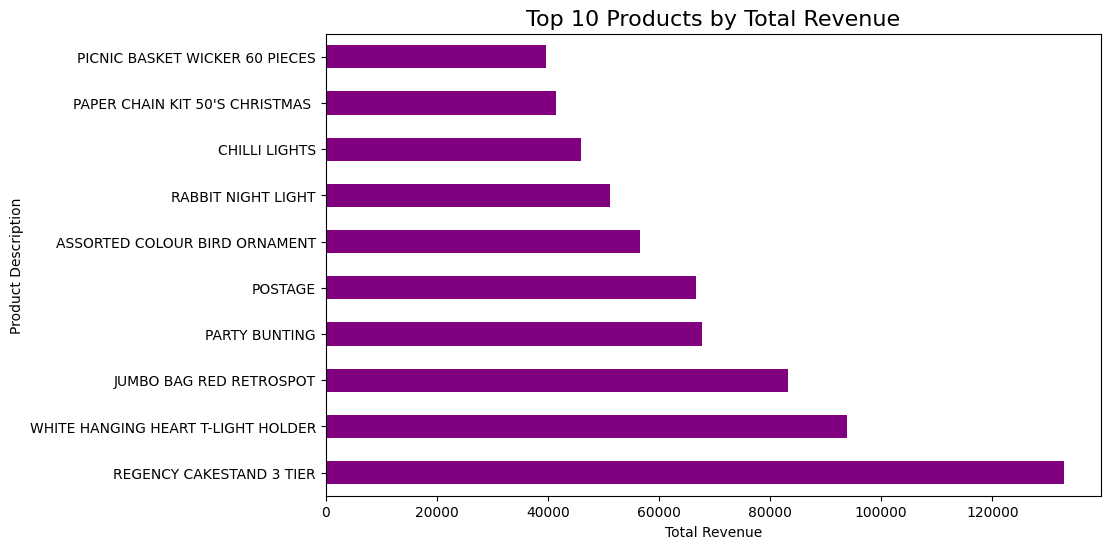

In [39]:
#Top 10 Products by Total Revenue
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='purple')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


**MULTIVARIENT ANALYSIS**

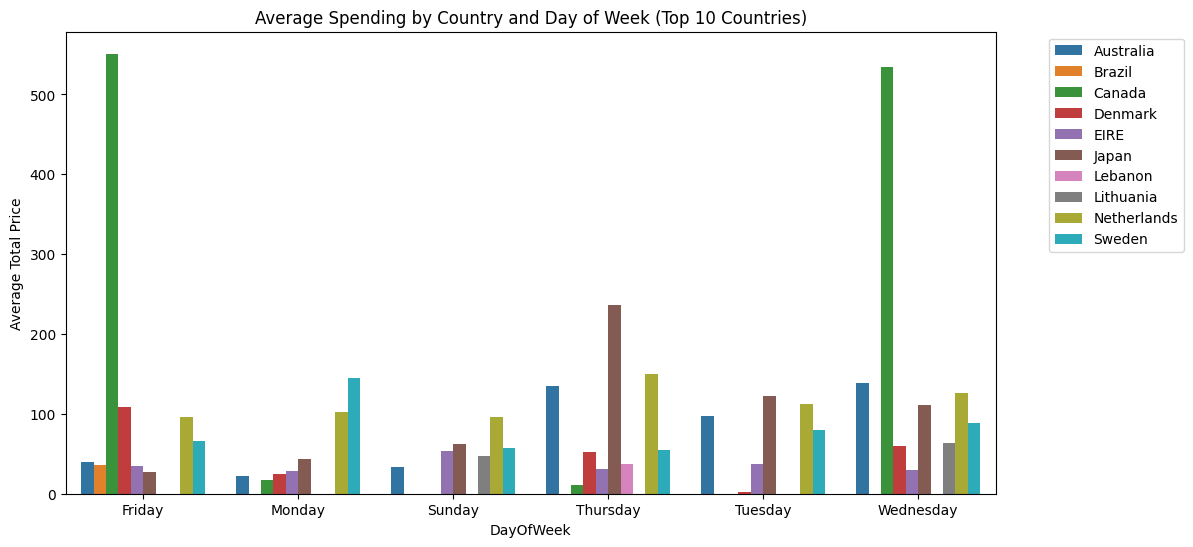

In [41]:
#Average Spending by Country & Day of Week
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Average spending per Country & Day of Week
avg_spending = df.groupby(['Country', 'DayOfWeek'])['TotalPrice'].mean().reset_index()

# Get top 10 countries by average spending overall
top_countries = (
    avg_spending.groupby('Country')['TotalPrice']
    .mean()
    .nlargest(10)
    .index
)

# Filter only top 10 countries
avg_spending = avg_spending[avg_spending['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(x='DayOfWeek', y='TotalPrice', hue='Country', data=avg_spending)
plt.title('Average Spending by Country and Day of Week (Top 10 Countries)')
plt.ylabel('Average Total Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


<Figure size 1200x600 with 0 Axes>

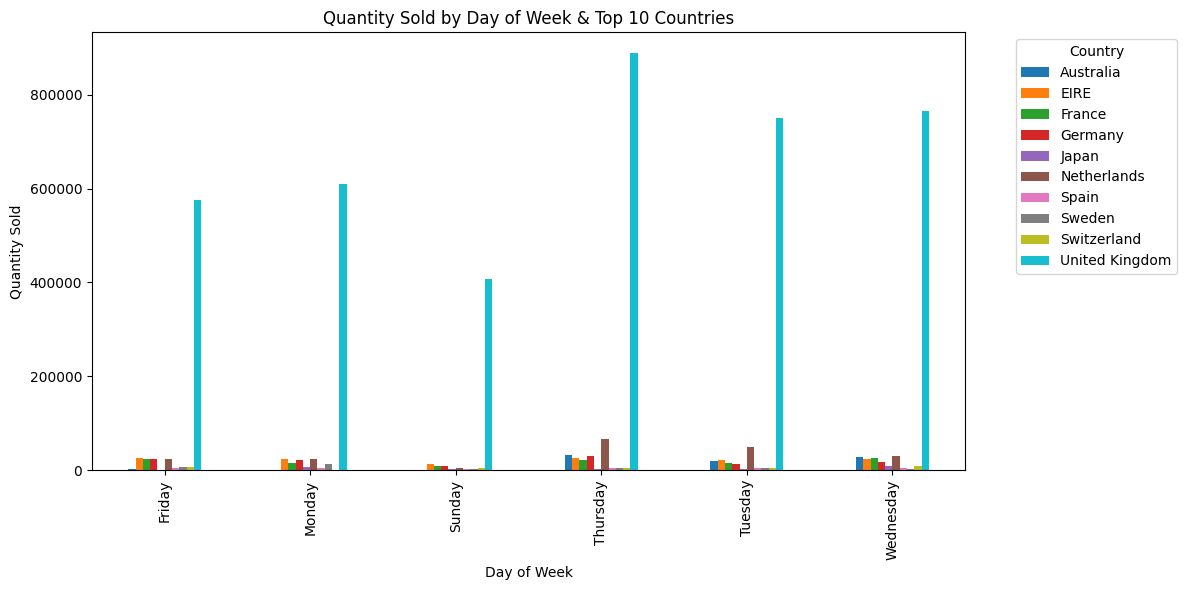

In [43]:
#Quantity Sold by Day of Week & Country
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Find top 10 countries by total quantity sold
top_10_countries = df.groupby('Country')['Quantity'].sum().nlargest(10).index

# Step 2: Filter data for only these top 10 countries
df_top_countries = df[df['Country'].isin(top_10_countries)]

# Step 3: Group by Day of Week & Country
quantity_by_day_country = df_top_countries.groupby(['DayOfWeek', 'Country'])['Quantity'].sum().reset_index()

# Step 4: Create a pivot table for visualization
pivot_table = quantity_by_day_country.pivot(index='DayOfWeek', columns='Country', values='Quantity')

# Step 5: Plot
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("Quantity Sold by Day of Week & Top 10 Countries")
plt.xlabel("Day of Week")
plt.ylabel("Quantity Sold")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**REMAINING EDA AFTER MULTIVARIENT**

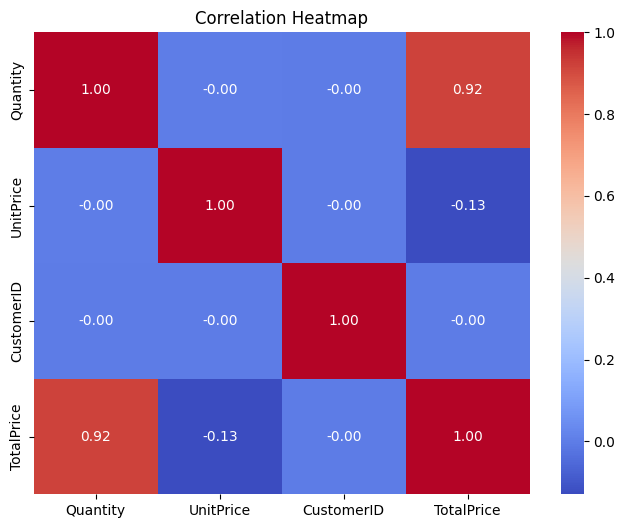

In [46]:
#Heatmap
# Select only numerical columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


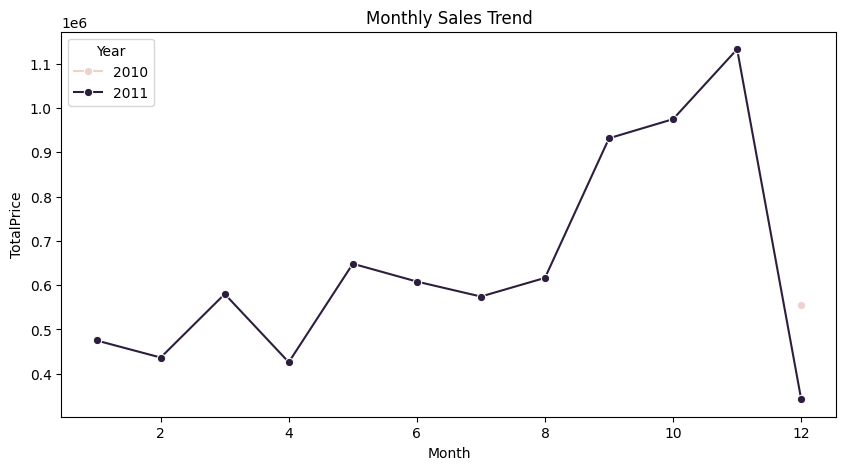

In [47]:
#Trend Analysis Over Time
# Ensure 'InvoiceDate' is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create time-based columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Monthly sales trend
monthly_sales = df.groupby(['Year','Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='TotalPrice', hue='Year', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.show()


/tmp/ipython-input-3438343103.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Description', data=top_products, palette='mako')


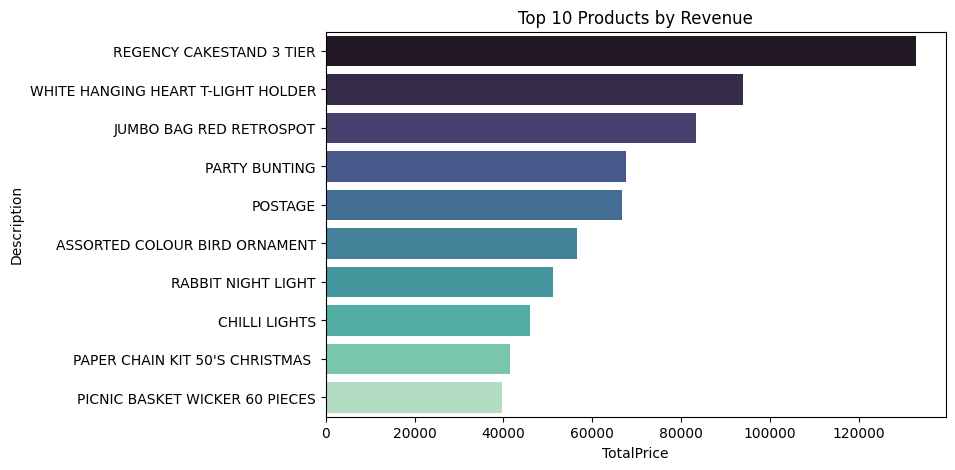

/tmp/ipython-input-3438343103.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_products_qty, palette='cubehelix')


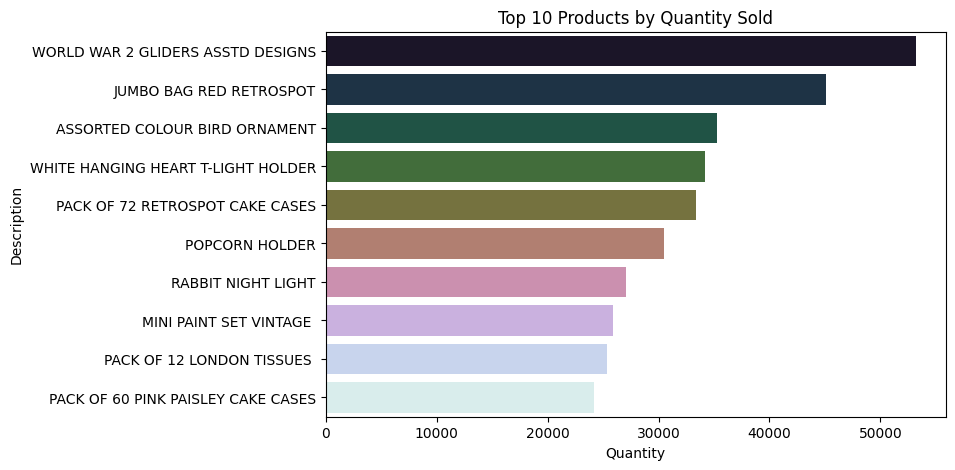

In [48]:
#product analysis
# Top 10 products by revenue
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='TotalPrice', y='Description', data=top_products, palette='mako')
plt.title("Top 10 Products by Revenue")
plt.show()

# Top 10 products by quantity
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Quantity', y='Description', data=top_products_qty, palette='cubehelix')
plt.title("Top 10 Products by Quantity Sold")
plt.show()


**INSIGHTS AND OBSERVATIONS:**

1)The dataset was analyzed using univariate, bivariate, and multivariate techniques, along with heatmap, trend, and product analyses.

2)Outliers and unrealistic values were removed to ensure clean insights.

3)Sales were found to be concentrated among a few top products and repeat customers, with seasonal spikes during festive months.

4) Discounts showed a negative impact on profit, highlighting the need for better pricing strategies.

5)High sales volume for certain low-margin products suggests opportunities to promote higher-margin items.

6)Seasonal and product-level trends can guide inventory planning and targeted marketing.

